In [114]:
import boto3
import pandas as pd
import gensim
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
import json
import string
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [99]:
def get_ingredients(bucket_name):
    s3 = boto3.resource('s3')
    bucket = s3.Bucket(bucket_name)
    ingredients = []
    recipe_id = []
    for obj in bucket.objects.all():
        print obj
        key = obj.key
        if key.endswith('json'):
            body = obj.get()['Body'].read()
            data = json.loads(body)
            for j in range(len(data)):
                try:
                    recipe = json.loads(data[j])
                    ingredients.append(recipe['ingredientLines'])
                    recipe_id.append(recipe['id'])
                except:
                    continue
    return (recipe_id,ingredients)
            
recipe_id, ingredients = get_ingredients('sudofood')
      
        

s3.ObjectSummary(bucket_name='sudofood', key=u'recipe_ids.txt')
s3.ObjectSummary(bucket_name='sudofood', key=u'recipes/')
s3.ObjectSummary(bucket_name='sudofood', key=u'recipes/recipe_json0.json')
s3.ObjectSummary(bucket_name='sudofood', key=u'recipes/recipe_json1000.json')
s3.ObjectSummary(bucket_name='sudofood', key=u'recipes/recipe_json10000.json')
s3.ObjectSummary(bucket_name='sudofood', key=u'recipes/recipe_json11000.json')
s3.ObjectSummary(bucket_name='sudofood', key=u'recipes/recipe_json12000.json')
s3.ObjectSummary(bucket_name='sudofood', key=u'recipes/recipe_json13000.json')
s3.ObjectSummary(bucket_name='sudofood', key=u'recipes/recipe_json14000.json')
s3.ObjectSummary(bucket_name='sudofood', key=u'recipes/recipe_json15000.json')
s3.ObjectSummary(bucket_name='sudofood', key=u'recipes/recipe_json16000.json')
s3.ObjectSummary(bucket_name='sudofood', key=u'recipes/recipe_json17000.json')
s3.ObjectSummary(bucket_name='sudofood', key=u'recipes/recipe_json18000.json')
s3.ObjectSumma

In [28]:
global ingredients 

In [124]:
words = [x.encode('utf-8','ignore').split(' ')  for item in ingredients for x in item]
words = [x.decode("utf8") for item in words for x in item]

In [97]:
len(words)

1182035

In [16]:
import re
ENGLISH_STOP_WORDS = frozenset([
    "a", "about", "above", "across", "after", "afterwards", "again", "against",
    "all", "almost", "alone", "along", "already", "also", "although", "always",
    "am", "among", "amongst", "amoungst", "amount", "an", "and", "another",
    "any", "anyhow", "anyone", "anything", "anyway", "anywhere", "are",
    "around", "as", "at", "back", "be", "became", "because", "become",
    "becomes", "becoming", "been", "before", "beforehand", "behind", "being",
    "below", "beside", "besides", "between", "beyond", "bill", "both",
    "bottom", "but", "by", "call", "can", "cannot", "cant", "co", "con",
    "could", "couldnt", "cry", "de", "describe", "detail", "do", "done",
    "down", "due", "during", "each", "eg", "eight", "either", "eleven", "else",
    "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone",
    "everything", "everywhere", "except", "few", "fifteen", "fifty", "fill",
    "find", "fire", "first", "five", "for", "former", "formerly", "forty",
    "found", "four", "from", "front", "full", "further", "get", "give", "go",
    "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter",
    "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his",
    "how", "however", "hundred", "i", "ie", "if", "in", "inc", "indeed",
    "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter",
    "latterly", "least", "less", "ltd", "made", "many", "may", "me",
    "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly",
    "move", "much", "must", "my", "myself", "name", "namely", "neither",
    "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone",
    "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on",
    "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our",
    "ours", "ourselves", "out", "over", "own", "part", "per", "perhaps",
    "please", "put", "rather", "re", "same", "see", "seem", "seemed",
    "seeming", "seems", "serious", "several", "she", "should", "show", "side",
    "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone",
    "something", "sometime", "sometimes", "somewhere", "still", "such",
    "system", "take", "ten", "than", "that", "the", "their", "them",
    "themselves", "then", "thence", "there", "thereafter", "thereby",
    "therefore", "therein", "thereupon", "these", "they", "thick", "thin",
    "third", "this", "those", "though", "three", "through", "throughout",
    "thru", "thus", "to", "together", "too", "top", "toward", "towards",
    "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us",
    "very", "via", "was", "we", "well", "were", "what", "whatever", "when",
    "whence", "whenever", "where", "whereafter", "whereas", "whereby",
    "wherein", "whereupon", "wherever", "whether", "which", "while", "whither",
    "who", "whoever", "whole", "whom", "whose", "why", "will", "with",
    "within", "without", "would", "yet", "you", "your", "yours", "yourself",
    "yourselves", "\xc2\xbc", "\xc2\xbd", "cup", "cups","ounces","ounce",
    "teaspoon", "tablespoon", "tablespoons", "teaspoons"," extract"])



def tokeniser(text):
    regex = re.compile('[' + re.escape(string.punctuation) + '0-9\\r\\t\\n]')
    text = regex.sub(" ", text.lower())
    words = text.encode('utf-8').split(" ")
    words = [w for w in words if not len(w) < 2]
    words = [w for w in words if w not in ENGLISH_STOP_WORDS]
    return words

In [25]:
tfidf = TfidfVectorizer(tokenizer = tokeniser, stop_words = ENGLISH_STOP_WORDS).fit(c)
def cosine_sim(text1, text2):
   tfidf = TfidfVectorizer().fit_transform([text1, text2])
   return ((tfidf * tfidf.T).A)[0,1]


In [29]:
def recommend_recipes(new_recipe):
    cos = []
    recommended_recipes = []
    for i in range(len(ingredients)):
        cos.append(cosine_sim(new_recipe,','.join([string.encode('utf-8','ignore') for string in ingredients[i]])))
    for j in sorted(range(len(cos)), key=lambda i: cos[i])[-10:]:
        recommended_recipes.append(recipe_id[j])
    return recommended_recipes

In [30]:
recommend_recipes('Chicken Rice')

[u'Kung-pao-chicken-365170',
 u'Uncle-Lang_s-Three-Teacup-Chicken-777345',
 u'Slow-Cooked-Chicken-And-Rice-Casserole-Recipezaar',
 u'Slow-Cooker-Chicken_-Broccoli_-and-Rice-1246935',
 u'Chicken-Poppy-Seed-Rice-Bake-2321222',
 u'Japgokbap-1283394',
 u'Mexican-style-Rice-632067',
 u'Chicken-Rice-a-Roni-Casserole-1100935',
 u'Slow-Cooker-Herbs-de-Provence-Chicken-_-Rice-Soup-478367',
 u'Cornell-Chicken-Barbecue-Sauce-History-and-2083272']

In [31]:
recommend_recipes('Mac and Cheese')

[u'Easy-Grilled-Pizza-551252',
 u'Grilled-Spinach-and-Feta-Stuffed-Mushrooms-1238290',
 u'All-In-One-Broccoli-Macaroni-and-Cheese-Food_com-125549',
 u'Broccoli-Bread-Recipezaar_1',
 u'Three-Cheese-Macaroni-and-Cheese-1638048',
 u'Pork-Tacos-_-Crispy-Like-Carnitas_-Food_com-119191',
 u'World_s-Best-Mac-_-Cheese-543687',
 u'Italian-Chicken-Roll-Ups-439628',
 u'Mac-and-cheese-lasagna-370318',
 u'Pumpkin-Mac-and-Cheese-1913798']

# Creating a dataframe

In [37]:
df = pd.DataFrame(columns = ['Recipe Name', 'Nutrition', 'Flavors','Servings'])
df

,Recipe Name,Nutrition,Flavors,Servings


In [54]:
def create_dataframe(df,bucket_name):
    s3 = boto3.resource('s3')
    bucket = s3.Bucket(bucket_name)
    recipe_id = []
    nutrition  = []
    flavors = []
    servings = []
    for obj in bucket.objects.all():
        #print obj
        key = obj.key
        if key.endswith('json'):
            body = obj.get()['Body'].read()
            data = json.loads(body)
            for j in range(len(data)):
                try:
                    recipe = json.loads(data[j])
                    recipe_id.append(recipe['id'])
                    nutrition.append(recipe['nutritionEstimates'])
                    flavors.append(recipe['flavors'])
                    servings.append(recipe['numberOfServings'])
                except:
                    continue
    df = pd.DataFrame(columns = ['recipe_id', 'nutrition', 'flavors', 'servings'])
    df['recipe_id'] = recipe_id
    df['nutrition'] = nutrition
    df['flavors'] = flavors
    df['servings'] = servings
    return (df)

In [55]:
df = create_dataframe(df, 'sudofood')

In [56]:
df.head()

,recipe_id,nutrition,flavors,servings
0,Crock-Pot-Mexican-Chicken-Recipezaar_2,"[{u'attribute': u'FAT_KCAL', u'unit': {u'name'...",{},8.0
1,Oreo-Truffle-Holiday-Ornaments-1966411,"[{u'attribute': u'FAT_KCAL', u'unit': {u'name'...","{u'Piquant': 0.0, u'Sour': 0.0, u'Salty': 0.83...",4.0
2,Frozen-Cucumber-Strawberry-Margaritas-1696233,"[{u'attribute': u'CAFFN', u'unit': {u'name': u...","{u'Piquant': 0.0, u'Sour': 0.8333, u'Salty': 0...",4.0
3,Barbecue-Beef-Ribs-1273893,"[{u'attribute': u'FAT_KCAL', u'unit': {u'name'...","{u'Piquant': 0.8333, u'Sour': 0.1667, u'Salty'...",5.0
4,General-Tso_s-Chicken-1587090,"[{u'attribute': u'FAT_KCAL', u'unit': {u'name'...","{u'Piquant': 0.1667, u'Sour': 0.1667, u'Salty'...",4.0


# Embeddings

In [129]:
final_list = []
for data in ingredients:
    ls = []
    for a in data:
        ls.extend(tokeniser(a))
    final_list.append(ls)

In [ ]:
def tokeniser(text):
    regex = re.compile('[' + re.escape(string.punctuation) + '0-9\\r\\t\\n]')
    text = regex.sub(" ", text.lower())
    words = text.split(" ")
    words = [w for w in words if not len(w) < 2]
    words = [w for w in words if w not in ENGLISH_STOP_WORDS]
    return words


In [130]:
from gensim.models import Word2Vec
model = Word2Vec(final_list, min_count=1)
print(model)
words = list(model.wv.vocab)
print(words)


Word2Vec(vocab=9309, size=100, alpha=0.025)
[u'creations\u2122', u'yellow', u'woods', u'clotted', u'woody', u'jeeragam', u'increase', u'canes', u'pillsbury\u2122', u'lori', u'prediced', u'nutty', u'shaving', u'packageof', u'deli', u'figs', u'melaleuca', u'sichuan', u'caramels', u'basics', u'broiler', u'wooden', u'wholemeal', u'broiled', u'nissin', u'courgette', u'eagle', u'plochman', u'miller', u'bacon', u'scraper', u'sodelicious', u'millet', u'tires', u'bacos', u'second', u'crisply', u'scraped', u'milled', u'centimeter', u'cooking', u'fingers', u'gujarati', u'galangal', u'dahi', u'dahl', u'herb', u'jasmine', u'kewra', u'fingers\xae', u'chini', u'kids', u'glutenfree', u'vigo', u'segments', u'grated\xa0', u'golden', u'divide', u'mushrooms\u2014optional', u'explained', u'replace', u'brought', u'nasoya', u'slivers', u'lawry\u2019s', u'extrafirm', u'pancetta', u'symphony', u'telegraph', u'garrof\xf3n', u'grahams', u'care', u'holy', u'glass', u'smelts', u'hole', u'hold', u'circumstances', u

/Users/nimesh/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


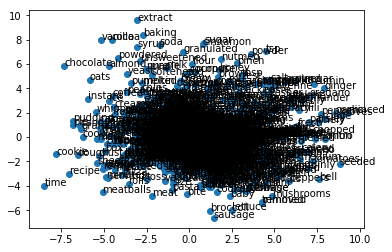

In [131]:
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()
